# HOME ASSIGNMENT 7: VERY PRACTICAL MACHINE LEARNING

## TODO 1: EDA
* Sử dụng bộ data [Kaggle - Ecommerce Customers](https://www.kaggle.com/srolka/ecommerce-customers)

## EDA
* Univariate Analysis: 
    - Trình bày các quan sát về phân phối của các biến
    - Bộ Data có các điểm nào cần chú ý (để thực hiện trong bước Data Processing)?
* Multivariate Analysis: 
    - Trình bày các tương tác thú vị giữa các biến, giải thích thêm theo ý kiến và suy nghĩ của bạn
## Customer Yearly Amount Spent
Yếu tố chúng ta quan tâm nhất là `Yearly Amount Spent` (Số tiền giao dịch của khách hàng trong năm)

Tự đặt các giả thuyết về yếu tố ảnh hướng (trong bộ data) và làm các bước phân tích, vẽ các biểu đồ để tìm hiểu các giả thuyết đó.

In [1]:
import pandas as pd
import matplotlib.pylab as plt
import matplotlib
import seaborn as sns

In [2]:
ecom_cust_df = pd.read_csv('Ecommerce Customers.csv')
ecom_cust_df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [3]:
ecom_cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [4]:
ecom_cust_df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [5]:
ecom_cust_df['Avatar'].describe()

count           500
unique          138
top       CadetBlue
freq              7
Name: Avatar, dtype: object

* Numeriacal variables: Avg. Session Length, Time on App, Time on Website, Length of Membership, Yearly Amount Spent.
Vì các biến này có giá trị số, cụ thể là ở dạng float.
* Categorical variables: Avatar. Biến Avatar bao gồm 500 quan sát được gom về 138 nhóm nên được xếp là biến phân loại.
* Các cột Email và Address sẽ khác biệt với mỗi quan sát (khách hàng), nên được dùng trong định danh khách hàng hơn là sử dụng để xây dựng mô hình.

Vì bộ dữ liệu không có nội dung description cho các cột thông tin, em sẽ đặt các giả định sau để giải thích ý nghĩa của các cột, nhằm thuận lợi hơn để phân tích sau này:
* Email & Address: Thông tin về Email và địa chỉ của khách hàng mua hàng trên trang thương mại điện tử
* Avatar: Màu chủ đạo của avatar khách hàng
* Avg. Session Length: Trung bình thời gian mỗi lần khách hàng sử dụng app hay Website (unit: minute)
* Time on App: Trung bình thời gian khách hàng tiếp cận trang ecommerce thông qua app (unit: minute)
* Time on Website: Trung bình thời gian khách hàng tiếp cận trang ecommerce thông qua Website (unit: minute)
* Length of Membership: Số năm khách hàng đăng kí thành viên (unit: year)
* Yearly Amount Spent: Trung bình số tiền khách hàng sử dụng trên trang ecommerce (unit: dollar)


In [6]:
ecom_cust_df['Time on App'].describe()

count    500.000000
mean      12.052488
std        0.994216
min        8.508152
25%       11.388153
50%       11.983231
75%       12.753850
max       15.126994
Name: Time on App, dtype: float64

Text(0, 0.5, 'dollar')

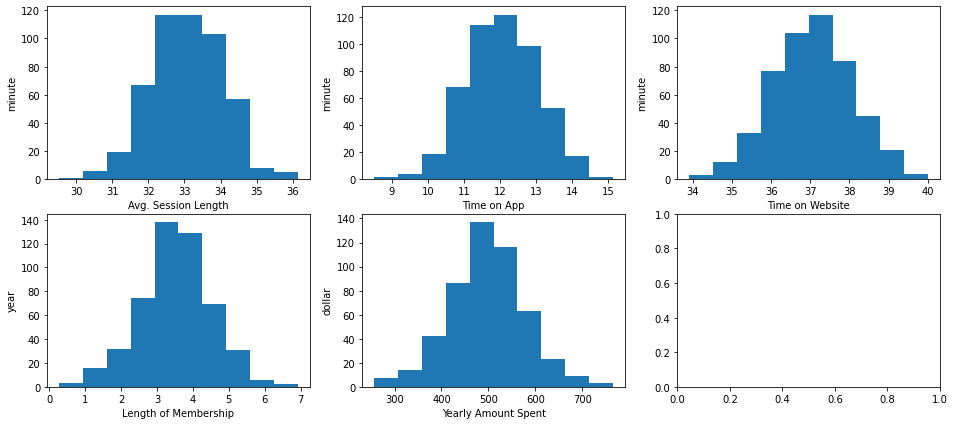

In [7]:
#Histogram for Numerical Variables and Line chart for Categorical variables
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (16,7))

ax = axes[0][0]
ax.hist(ecom_cust_df['Avg. Session Length'])
ax.set_axisbelow(True) #show the grid lines behind the histogram
ax.set_xlabel('Avg. Session Length')
ax.set_ylabel('minute')


ax = axes[0][1]
ax.hist(ecom_cust_df['Time on App'])
ax.set_axisbelow(True) #show the grid lines behind the histogram
ax.set_xlabel('Time on App')
ax.set_ylabel('minute')

ax = axes[0][2]
ax.hist(ecom_cust_df['Time on Website'])
ax.set_axisbelow(True) #show the grid lines behind the histogram
ax.set_xlabel('Time on Website')
ax.set_ylabel('minute')

ax = axes[1][0]
ax.hist(ecom_cust_df['Length of Membership'])
ax.set_axisbelow(True) #show the grid lines behind the histogram
ax.set_xlabel('Length of Membership')
ax.set_ylabel('year')

ax = axes[1][1]
ax.hist(ecom_cust_df['Yearly Amount Spent'])
ax.set_axisbelow(True) #show the grid lines behind the histogram
ax.set_xlabel('Yearly Amount Spent')
ax.set_ylabel('dollar')

* Trung bình khách hàng thường sử dụng từ 31 đến 35p cho mỗi một lần sử dụng trang ecommerce
* Thông thường khách hàng sử dụng app khoảng 10 đến 14p, trong khi con số này ở website là 35 đến 39p => Có thể khách hàng có thói quen mua hàng qua website nhiều hơn app, hoặc là do sử dụng trên giao diện app sẽ dễ dàng hơn, tốn ít thời gian hơn?
* Đa phần khách hàng có thời gian làm thành viên trong khoảng từ 1.5 đến 5.5 năm
* Đa phần khách hàng tiêu từ 350 đến 650 dollar cho mua sắm.

<AxesSubplot:>

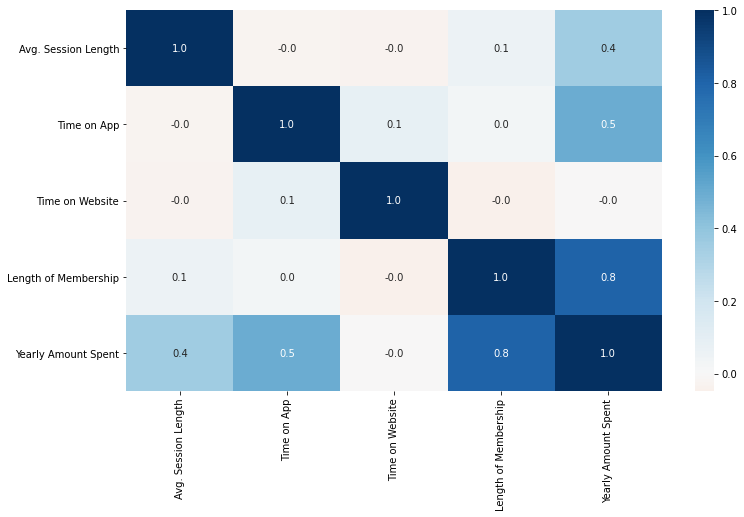

In [8]:
#Heatmap
corr = ecom_cust_df.corr()
fig, ax = plt.subplots()
fig.set_size_inches(12, 7)
sns.heatmap(corr, annot = True, fmt = ".1f", cmap = "RdBu", center = 0, ax = ax)

<AxesSubplot:xlabel='Length of Membership', ylabel='Yearly Amount Spent'>

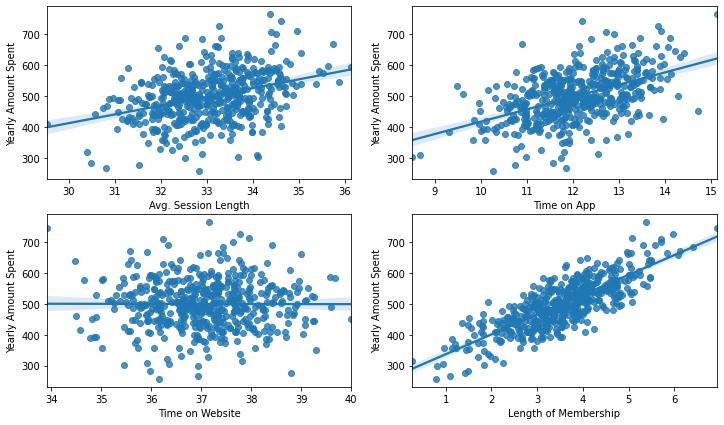

In [9]:
fig, axes = plt.subplots(ncols=2, nrows= 2, figsize = (12, 7))

ax = axes[0][0]
sns.regplot(x= 'Avg. Session Length', y= 'Yearly Amount Spent', data= ecom_cust_df, ax = ax)

ax = axes[0][1]
sns.regplot(x = 'Time on App', y = 'Yearly Amount Spent', data = ecom_cust_df, ax = ax)

ax = axes[1][0]
sns.regplot(x = 'Time on Website', y = 'Yearly Amount Spent', data = ecom_cust_df, ax = ax)

ax = axes[1][1]
sns.regplot(x = 'Length of Membership', y = 'Yearly Amount Spent', data = ecom_cust_df, ax = ax)

* Biến thời gian một lần sử dụng có tương quan dương với số tiền chi tiêu một năm => Mua nhiều nên sẽ tốn thời gian nhiều?
* Số tiền chi tiêu một năm có tương quan dương với thời gian sử dụng app nhưng không có sự tương quan với thời gian sử dụng web => Người mua nhiều hơn thường sử dụng app hơn là sử dụng web?
* Số tiền chi tiêu một năm có tương quan dương với thời gian đăng kí thành viên => khách hàng lâu năm có xu hướng mua hàng nhiều hơn?

## TODO 2: LINEAR REGRESSIONS
Xem lại Lab về Linear Regressions. Tìm hiểu thêm các notebook khác trên Kaggle. 

Thực hiện bài toán Linear Regression với biến target (y) là `Yearly Amount Spent`. 
Lưu ý trình bày đầy đủ các bước:
* Data Processing
* Split Train & Test Data
* Modeling
* Evaluation

In [10]:
#Data Processing: X, y
#Chọn các biến dự báo và biến Y
excludeColumns = ('Email','Address', 'Avatar', 'Time on Website', 'Yearly Amount Spent')
predictors = [s for s in ecom_cust_df.columns if s not in excludeColumns]
outcome = 'Yearly Amount Spent'

#Tách df ra thành hai bộ dữ liệu X và Y
X = ecom_cust_df[predictors]
y = ecom_cust_df[outcome]

X.head()

,Avg. Session Length,Time on App,Length of Membership
0,34.497268,12.655651,4.082621
1,31.926272,11.109461,2.664034
2,33.000915,11.330278,4.104543
3,34.305557,13.717514,3.120179
4,33.330673,12.795189,4.446308


In [11]:
#Split train, test data
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 8)

train_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350 entries, 141 to 451
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Avg. Session Length   350 non-null    float64
 1   Time on App           350 non-null    float64
 2   Length of Membership  350 non-null    float64
dtypes: float64(3)
memory usage: 10.9 KB


In [12]:
#Building model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(train_X, train_y)

train_pred = model.predict(train_X)
train_result = pd.DataFrame({
    'Yearly Amount Spent': train_y,
    'Predicted': train_pred,
    'residual': train_y - train_pred})
train_result.head()

,Yearly Amount Spent,Predicted,residual
141,472.992247,465.406718,7.585528
254,482.602467,489.898750,-7.296283
419,483.543194,478.524112,5.019082
240,398.163469,411.511601,-13.348132
421,544.409272,559.641973,-15.232701


In [13]:
test_pred = model.predict(test_X)
test_result = pd.DataFrame({
    'Yearly Amount Spent': test_y,
    'Predicted': test_pred,
    'residual': test_y - test_pred
})
test_result.head()

,Yearly Amount Spent,Predicted,residual
370,521.240780,520.046307,1.194473
56,520.898794,522.932844,-2.034050
149,465.889313,464.694183,1.195130
247,647.619456,651.573259,-3.953803
97,614.715334,623.046939,-8.331605


In [14]:
#Model Evaluation
!pip install dmba
from dmba import regressionSummary

In [15]:
regressionSummary(train_result['Yearly Amount Spent'], train_result.Predicted)

regressionSummary(test_result['Yearly Amount Spent'], test_result.Predicted)


Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 9.9948
            Mean Absolute Error (MAE) : 7.9281
          Mean Percentage Error (MPE) : -0.0454
Mean Absolute Percentage Error (MAPE) : 1.6300

Regression statistics

                      Mean Error (ME) : -0.2423
       Root Mean Squared Error (RMSE) : 9.8181
            Mean Absolute Error (MAE) : 7.8345
          Mean Percentage Error (MPE) : -0.0629
Mean Absolute Percentage Error (MAPE) : 1.5984


* Giá trị ME của model đối với dữ liệu test nhỏ hơn nhiều so với đơn vị của 'Yearly Amount Spent', tuy nhiên, vì ME có thể nhỏ do các giá trị sai số dương và âm bù trừ cho nhau, nên cần nhìn vào giá trị RMSE của mô hình
* Giá trị RMSE của mô hình đối với cả hai bộ dữ liệu đều có xu hướng nhỏ hơn nhiều so với giá trị đơn vị của "Yearly Amount Spent', nên có thể kì vọng là mô hình có khả năng khớp cao với dữ liệu (goodness-of-fit)
* Chỉ số MAPE (Mean Absolute Percentage Error): nghĩa là đo mức độ phần trăm của sai số đối với giá trị thực tế, ở đây, mức sai số khoảng 1.6% giá trị thực tế của 'Yearly Amount Spent' trên tập dữ liệu test.

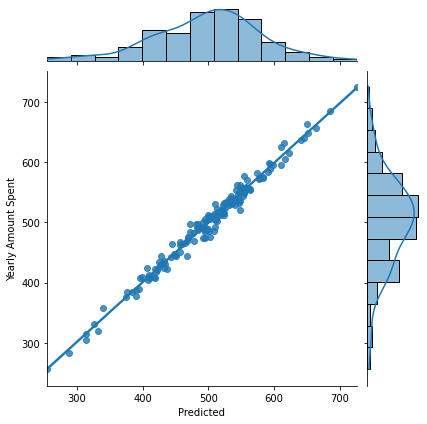

In [16]:
sns.jointplot(x='Predicted', y='Yearly Amount Spent', data= test_result,kind='reg')

Dựa vào biểu đồ phân phối và scatter plot của giá trị predicted trên data test và giá trị thực tế của Yearly Amount Spent, có thể thấy mô hình có khả năng dự báo tốt.

## TODO 3: CUSTOMER CLUSTERING
Tham khảo notebook sau: [Clustering with K-Means](https://www.kaggle.com/ryanholbrook/clustering-with-k-means#k-Means-Clustering)

* Áp dụng phương pháp Clustering lên bộ data để chia customers thành n nhóm (n tuỳ theo bạn lựa chọn)
* Trên n nhóm đã phân ra bằng clustering, trình bày chỉ số thông kê và phân phối của các biến sau: `Time on App`, `Avg. Session Length`, `Time on Website`, `Length of Membership`
* Visualize plot các yếu tố trên theo cặp. Ví dụ như bên dưới (cluster = các nhóm khác hàng đã chia)
![clustering](../img/clustering.png)
* Trình bày các quyết định, chiến lược kinh doanh có thể thực hiện dựa trên kết quả của clustering để giúp tăng doanh thu.

In [17]:
# Import modules
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score

In [18]:
#Standardize
features = ['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']

X_clus = ecom_cust_df[features]
X_scaled = ecom_cust_df.loc[:, features]
X_scaled = (X_scaled - X_scaled.mean(axis=0)) / X_scaled.std(axis=0)

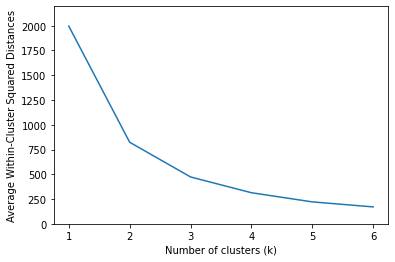

In [19]:
#Using elbow-chart to identidy the k values
inertia = []
for n_clusters in range(1, 7):
 kmeans = KMeans(n_clusters=n_clusters,
random_state=0).fit(X_scaled)
 inertia.append(kmeans.inertia_ / n_clusters)
inertias = pd.DataFrame({'n_clusters': range(1, 7), 'inertia': inertia})
ax = inertias.plot(x='n_clusters', y='inertia')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Average Within-Cluster Squared Distances')
plt.ylim((0, 1.1 * inertias.inertia.max()))
ax.legend().set_visible(False)
plt.show()

In [20]:
# Fit model
kmeans = KMeans(n_clusters=4, random_state=0)
X_clus['Cluster'] = kmeans.fit_predict(X_scaled)

X_clus.head()

ipykernel_launcher:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Cluster
0,34.497268,12.655651,39.577668,4.082621,2
1,31.926272,11.109461,37.268959,2.664034,1
2,33.000915,11.330278,37.110597,4.104543,3
3,34.305557,13.717514,36.721283,3.120179,2
4,33.330673,12.795189,37.536653,4.446308,0


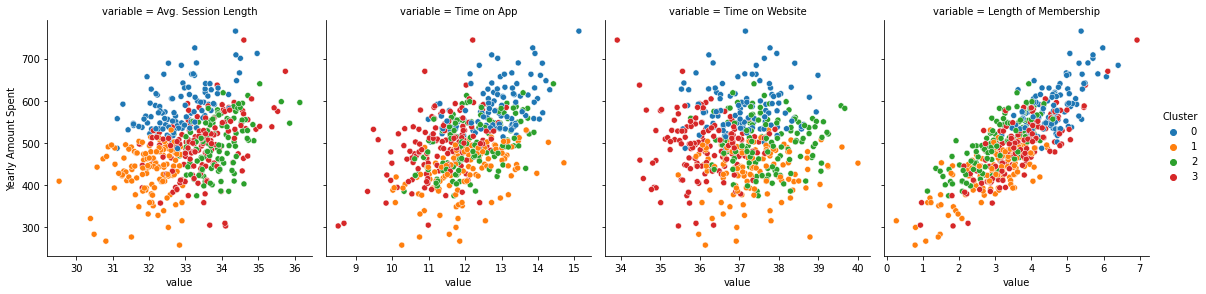

In [21]:
Xy = X_clus.copy()
Xy["Cluster"] = Xy.Cluster.astype("category")
Xy["Yearly Amount Spent"] = y
sns.relplot(
    x="value", y="Yearly Amount Spent", hue="Cluster", col="variable",
    height=4, aspect=1, facet_kws={'sharex': False}, col_wrap=4,
    data=Xy.melt(
        value_vars=features, id_vars=["Yearly Amount Spent", "Cluster"],
    ),
)

* Dựa vào biểu đồ, nhóm khách hàng có Yearly Amount Spent là nhóm 0 - có giá trị Yearly Amount Spent từ khoảng 550 dollar trở lên - tương ứng các giá trị ở các biến khác như sau: Giá trị Avg. Session Length từ khoảng 31-34p, giá trị Time on App từ 11p-15p, giá trị Length of Membership từ 4 nằm trở lên. Chứng tỏ đây là nhóm khách hàng có thành viên trung thành với công ty, có thời gian thực hiện một session trung bình (có sự quen thuộc đối với app/trang web của công ty nên không cần sử dụng lâu), và có xu hướng sử dụng app nhiều hơn các nhóm khách hàng khác, trong khi đó thì thời gian sử dụng website trung bình trong các nhóm => Có thể gửi các voucher dành cho app dành cho nhóm đối tượng khách hàng này.
* Nhóm khách hàng có Yearly Amount thấp, thuộc nhóm 1, sẽ có thói quen dành ít thời gian cho các session mua sắm và thường là nhóm đối tượng khách hàng mới, cũng như thời gian sử dụng app của họ cũng ít hơn so với nhóm 0. Có thể do họ chưa có thói quen sử dụng app để mua sắm và chưa dành nhiều thời gian mỗi khi mua sắm trên app => Có thể tăng thói quen sử dụng của họ bằng cách gửi những quảng cáo/thông báo cho họ để họ nhìn thấy tên của công ty chúng ta nhiều hơn.

## TODO 4 (OPTIONAL) DECISION TREE
* Tạo biến `HighVal_Cust` (High-value Customers) là những khách hàng có `Yearly Amount Spent` > 80% percentiles của mẫu data. 
* Tham khảo notebook sau: [Decision-Tree Classifier Tutorial](https://www.kaggle.com/prashant111/decision-tree-classifier-tutorial)
* Dùng Decision Tree để phân loại `HighVal_Cust`
* Visualize Decision Tree giúp phân loại các khách hàng có giá trị cao.
![decisiontree](../img/decisiontree.png)

In [22]:
#Create the High-value var
'''
- Tính giá trị ở mức 80% của biến Yearly Amount Spent
- Biến HighVal_Cust sẽ nhận giá trị 1 nếu lớn hơn giá trị 80% và 0 nếu nhỏ hơn
'''
df = ecom_cust_df.copy()
X_tree = df[features]
threshold = df['Yearly Amount Spent'].quantile(.8)

df['HighVal_Cust'] = ''
HighVal = []
for row in df['Yearly Amount Spent']:
    if row > threshold:
        HighVal.append('1')
    else: 
        HighVal.append('0')
df['HighVal_Cust'] = HighVal
y_tree = df['HighVal_Cust']
y_tree

0      1
1      0
2      0
3      1
4      1
      ..
495    1
496    0
497    0
498    0
499    0
Name: HighVal_Cust, Length: 500, dtype: object

In [23]:
#Import modules
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from dmba import plotDecisionTree, classificationSummary, regressionSummary
import pydotplus
!pip install graphviz
import graphviz

Classes: 0, 1


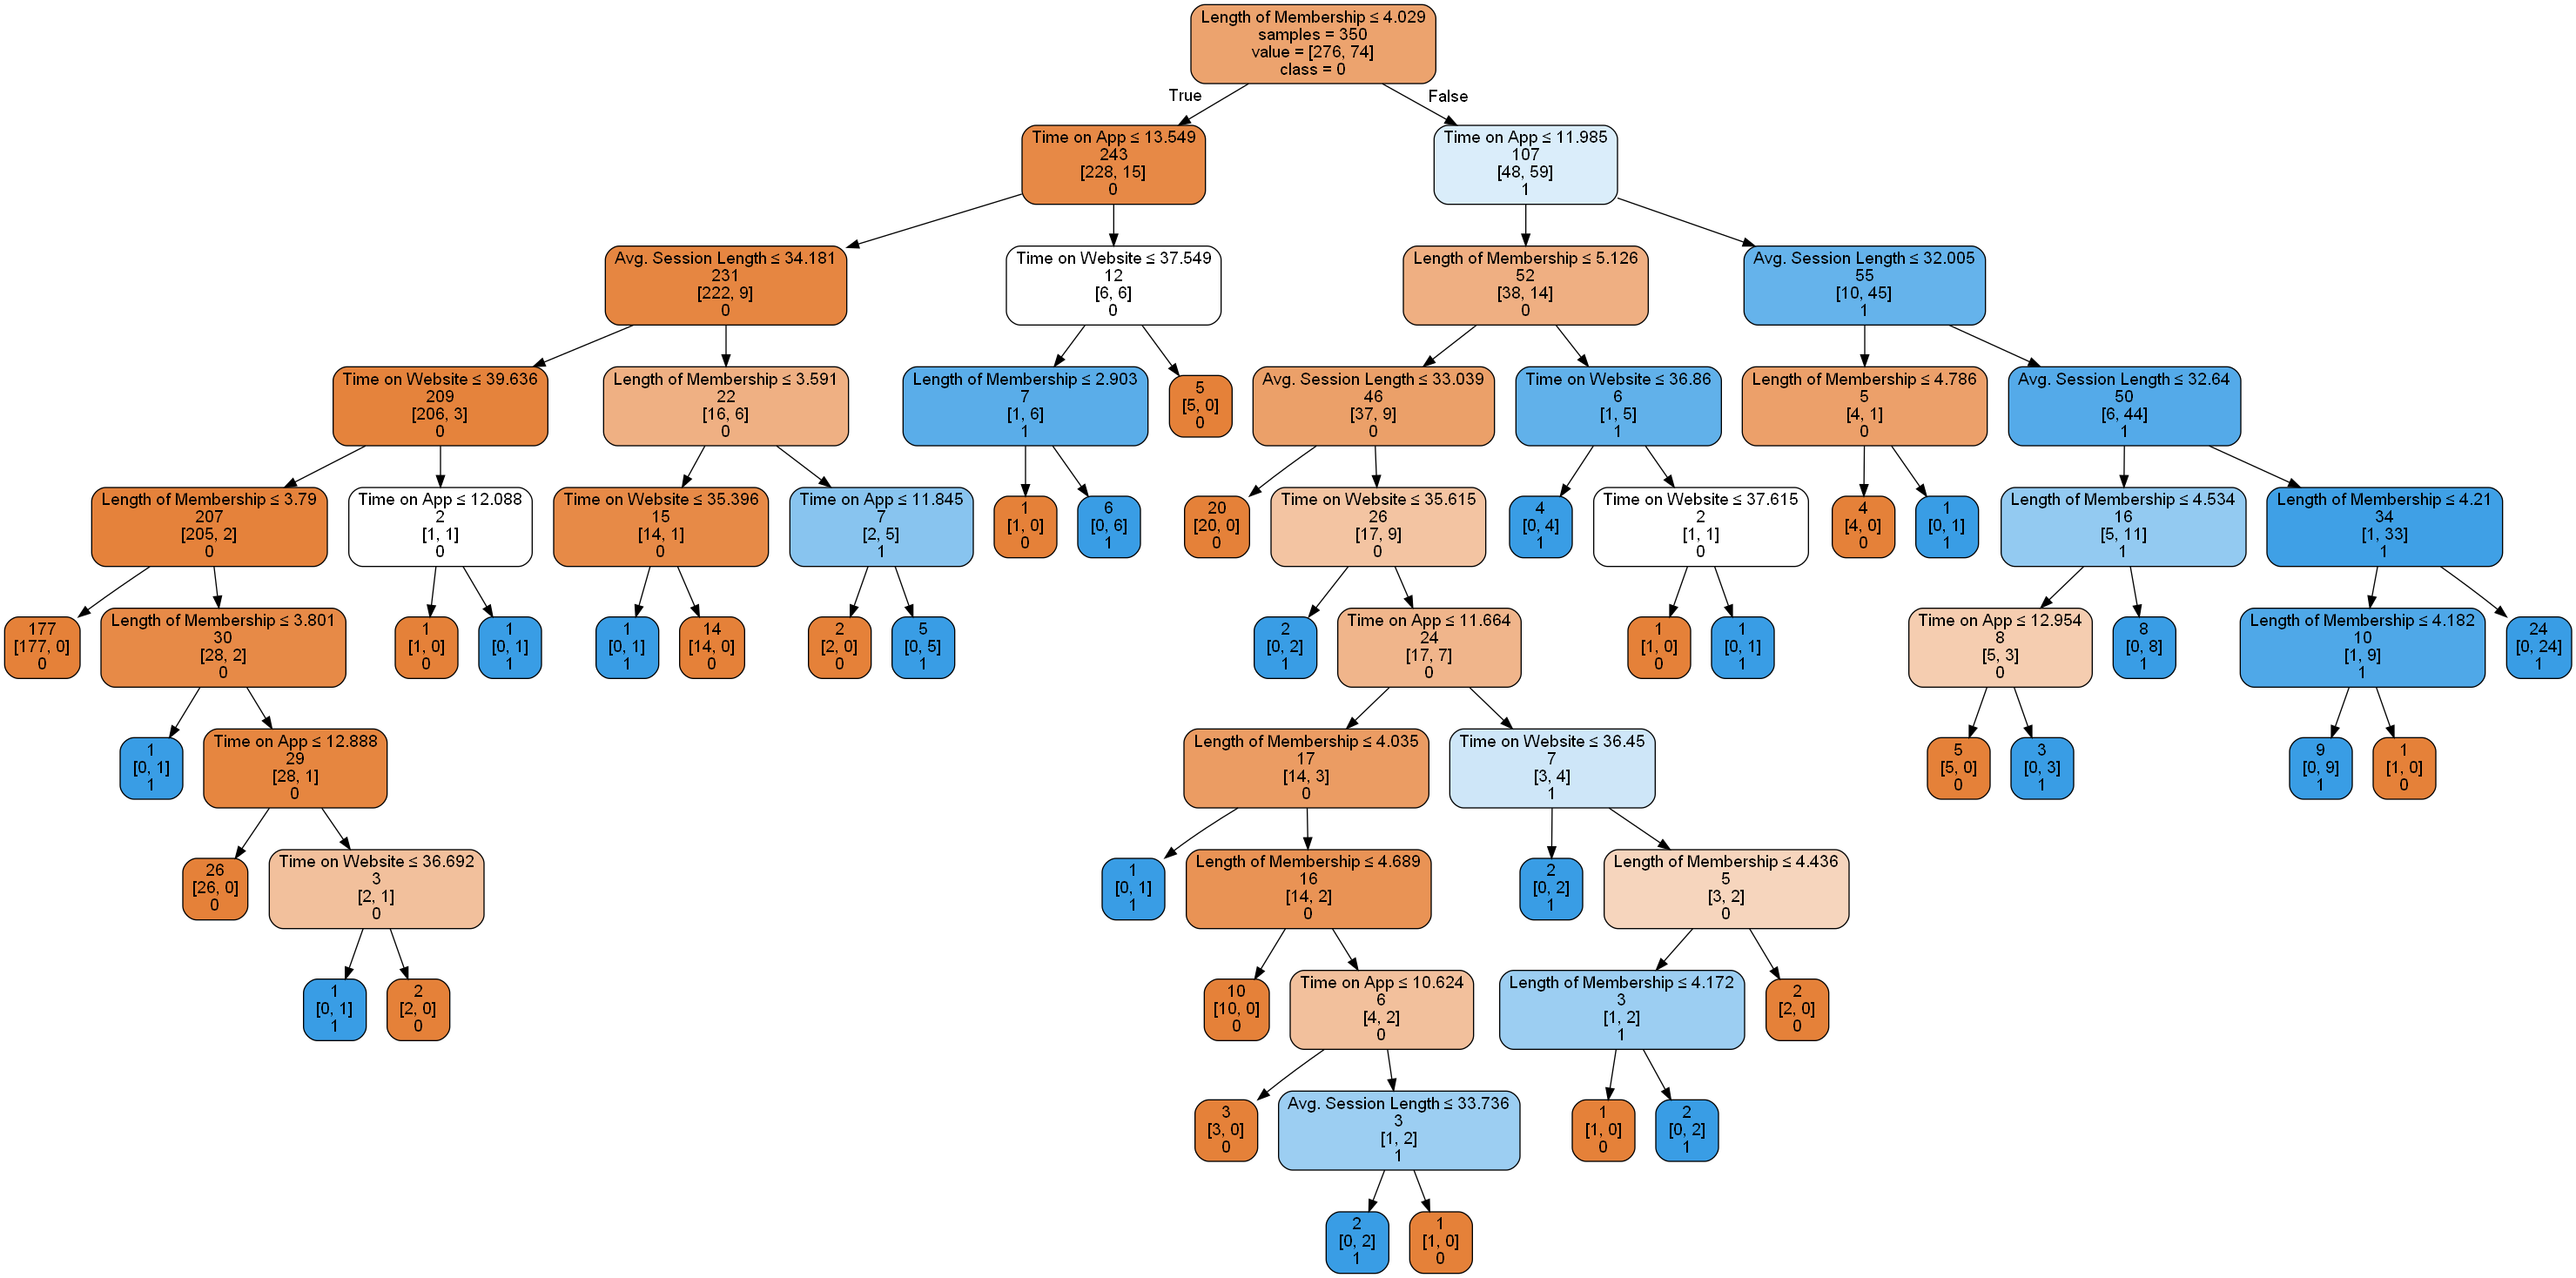

In [24]:
#Split the dataset
train_Xtree, test_Xtree, train_ytree, test_ytree = train_test_split(X_tree, y_tree, test_size=0.3, random_state=0)

#Fit model
classTree= DecisionTreeClassifier(random_state=0, max_depth=None)
classTree.fit(train_Xtree, train_ytree)
print("Classes: {}".format(', '.join(classTree.classes_)))
plotDecisionTree(classTree, feature_names=X_tree.columns[:7], class_names= classTree.classes_)

In [26]:
# Evaluating using confusion matrix
# Training set
classificationSummary(train_ytree, classTree.predict(train_Xtree))

# Test set
classificationSummary(test_ytree, classTree.predict(test_Xtree))

Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual   0   1
     0 276   0
     1   0  74
Confusion Matrix (Accuracy 0.9133)

       Prediction
Actual   0   1
     0 116   8
     1   5  21
